<a href="https://colab.research.google.com/github/bedadiggelmann/bina/blob/main/BINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

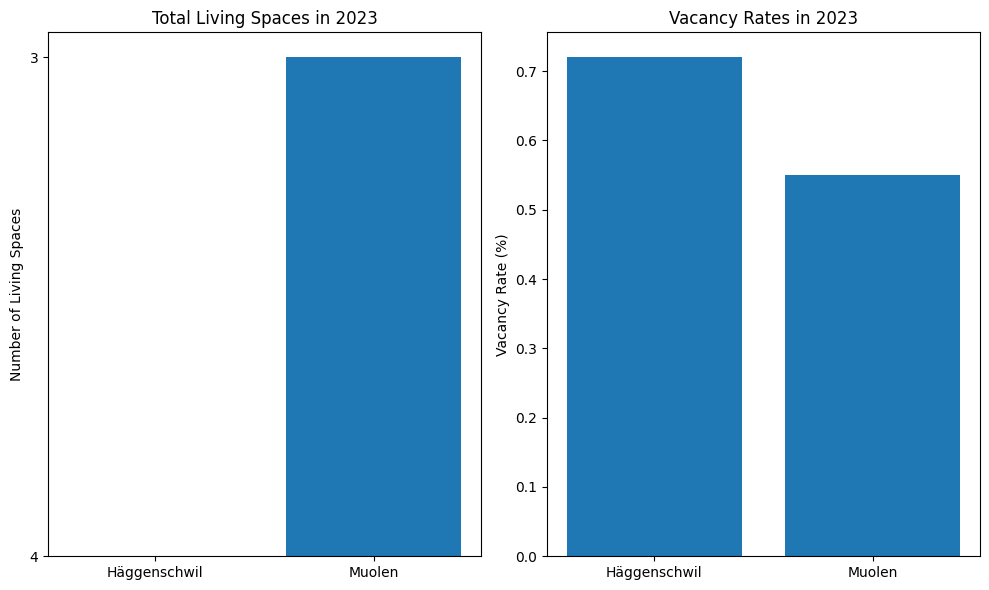

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Loading the Data
csv_path = 'kanton_stgallen.csv'
csv_data = pd.read_csv(csv_path, encoding='ISO-8859-1', delimiter=';')

# Filtering data for Häggenschwil and Muolen
gemeinde_haeggenschwil_data = csv_data[csv_data['Grossregion (<<) / Kanton (-) / Gemeinde (......)'].str.contains('3201')]
gemeinde_muolen_data = csv_data[csv_data['Grossregion (<<) / Kanton (-) / Gemeinde (......)'].str.contains('3202')]

# Extracting data for 'Anzahl Wohnräume - Total' for each municipality
haeggenschwil_total_living_spaces = gemeinde_haeggenschwil_data[gemeinde_haeggenschwil_data['Anzahl Wohnräume'] == 'Anzahl Wohnräume - Total']['2023'].values[0]
muolen_total_living_spaces = gemeinde_muolen_data[gemeinde_muolen_data['Anzahl Wohnräume'] == 'Anzahl Wohnräume - Total']['2023'].values[0]

# Extracting 'Leerwohnungsziffer' (vacancy rates) for each municipality for the year 2023
haeggenschwil_vacancy_rate = gemeinde_haeggenschwil_data[(gemeinde_haeggenschwil_data['Leerwohnung (Typ)'].str.contains('Total')) & (gemeinde_haeggenschwil_data['Anzahl/Anteil'] == 'Leerwohnungsziffer')]['2023'].values[0]
muolen_vacancy_rate = gemeinde_muolen_data[(gemeinde_muolen_data['Leerwohnung (Typ)'].str.contains('Total')) & (gemeinde_muolen_data['Anzahl/Anteil'] == 'Leerwohnungsziffer')]['2023'].values[0]

# Now, let's create a simple visualization to compare these metrics
plt.figure(figsize=(10, 6))

# Bar plot for total living spaces
plt.subplot(1, 2, 1)
plt.bar(['Häggenschwil', 'Muolen'], [haeggenschwil_total_living_spaces, muolen_total_living_spaces])
plt.title('Total Living Spaces in 2023')
plt.ylabel('Number of Living Spaces')

# Bar plot for vacancy rates
plt.subplot(1, 2, 2)
plt.bar(['Häggenschwil', 'Muolen'], [float(haeggenschwil_vacancy_rate), float(muolen_vacancy_rate)])
plt.title('Vacancy Rates in 2023')
plt.ylabel('Vacancy Rate (%)')

plt.tight_layout()
plt.show()


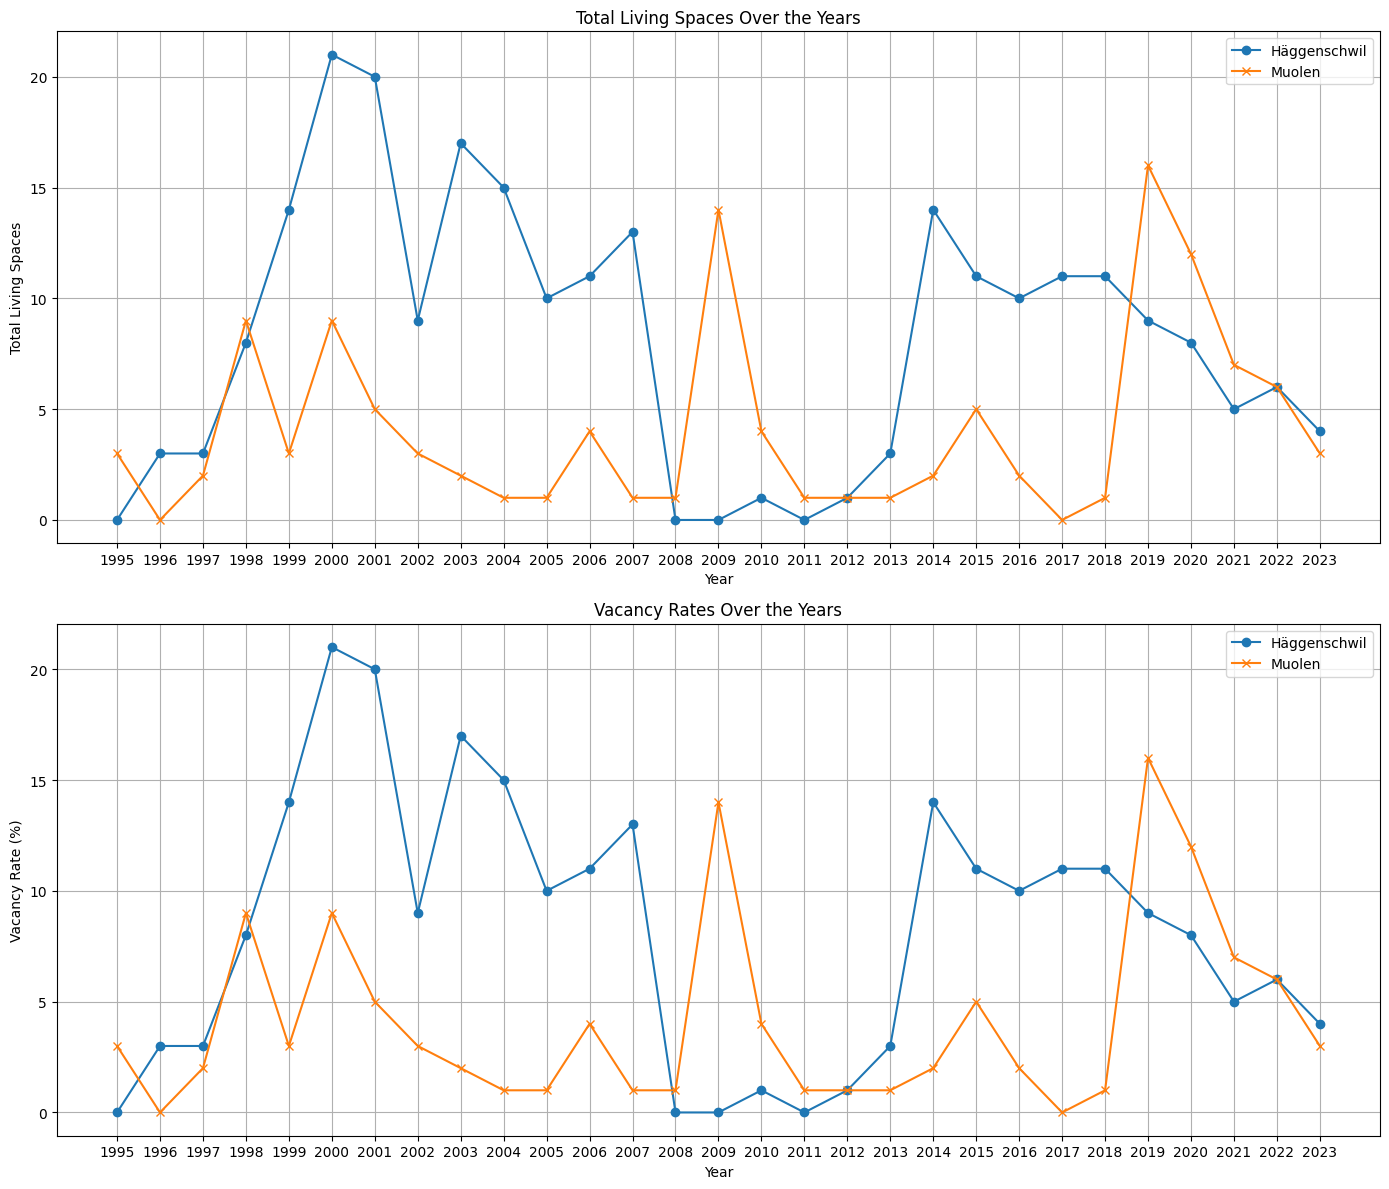

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
csv_path = 'kanton_stgallen.csv'
csv_data = pd.read_csv(csv_path, encoding='ISO-8859-1', delimiter=';')

# Step 2: Filter data for Häggenschwil and Muolen
gemeinde_haeggenschwil_data = csv_data[csv_data['Grossregion (<<) / Kanton (-) / Gemeinde (......)'].str.contains('3201')]
gemeinde_muolen_data = csv_data[csv_data['Grossregion (<<) / Kanton (-) / Gemeinde (......)'].str.contains('3202')]

# Helper function to extract yearly data, handling non-numeric values correctly
def extract_yearly_data_corrected(gemeinde_data, condition_column, condition_value):
    yearly_data = gemeinde_data[gemeinde_data[condition_column] == condition_value].iloc[:, 4:]
    yearly_data = yearly_data.replace('...', pd.NA)  # Replace '...' with NaN
    yearly_data = yearly_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors
    return yearly_data.iloc[0] if not yearly_data.empty else pd.Series([pd.NA] * len(years), index=years)

# Extracting yearly data for total living spaces and vacancy rates
haeggenschwil_total_living_spaces_yearly = extract_yearly_data_corrected(gemeinde_haeggenschwil_data, 'Anzahl Wohnräume', 'Anzahl Wohnräume - Total')
muolen_total_living_spaces_yearly = extract_yearly_data_corrected(gemeinde_muolen_data, 'Anzahl Wohnräume', 'Anzahl Wohnräume - Total')

haeggenschwil_vacancy_rates_yearly = extract_yearly_data_corrected(gemeinde_haeggenschwil_data, 'Leerwohnung (Typ)', 'Leer stehende Wohnung - Total')
muolen_vacancy_rates_yearly = extract_yearly_data_corrected(gemeinde_muolen_data, 'Leerwohnung (Typ)', 'Leer stehende Wohnung - Total')

# Years for the x-axis
years = csv_data.columns[4:]  # Assuming year data starts from the 5th column

# Plotting the comparison
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Plot Total Living Spaces
ax[0].plot(years, haeggenschwil_total_living_spaces_yearly, label='Häggenschwil', marker='o')
ax[0].plot(years, muolen_total_living_spaces_yearly, label='Muolen', marker='x')
ax[0].set_title('Total Living Spaces Over the Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total Living Spaces')
ax[0].legend()
ax[0].grid(True)

# Plot Vacancy Rates
ax[1].plot(years, haeggenschwil_vacancy_rates_yearly, label='Häggenschwil', marker='o')
ax[1].plot(years, muolen_vacancy_rates_yearly, label='Muolen', marker='x')
ax[1].set_title('Vacancy Rates Over the Years')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Vacancy Rate (%)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
